<a href="https://colab.research.google.com/github/SHRAVAN-AMBEER/Machine-Learning-Lab/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis

Mean Absolute Error (MAE): 6562.931034482754
Mean Squared Error (MSE): 51337688.76337686
Root Mean Squared Error (RMSE): 7165.032363037648
R² Score: 0.898592219726663
Equation of line: Salary = 4553.45 * YearsExperience + 30331.03


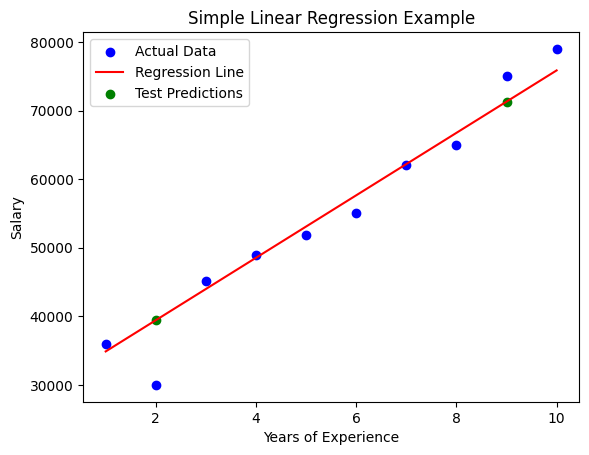

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.DataFrame({
    'YearsExperience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [36000, 30000, 45200, 49000, 51800,
               55000, 62000, 65000, 75000, 79000]
})

X = data[['YearsExperience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


m = model.coef_[0]  # slope
c = model.intercept_  # intercept
print(f"Equation of line: Salary = {m:.2f} * YearsExperience + {c:.2f}")

# Visualization
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(X_test, y_pred, color='green', label='Test Predictions')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression Example")
plt.legend()
plt.show()


Mean Absolute Error (MAE): 0.5311643817546476
Mean Squared Error (MSE): 0.5243209861846072
Root Mean Squared Error (RMSE): 0.7241001216576387
R-squared (R2): 0.606232685199805
Adjusted R-squared: 0.606079995629818
Prediction for new sample: 4.13

Actual vs Predicted Values:
Actual: 4.53 	 Predicted: 4.13
Actual: 3.58 	 Predicted: 3.98
Actual: 3.52 	 Predicted: 3.68
Actual: 3.41 	 Predicted: 3.24
Actual: 3.42 	 Predicted: 2.41
Actual: 2.70 	 Predicted: 2.68
Actual: 2.99 	 Predicted: 2.40
Actual: 2.41 	 Predicted: 2.25
Actual: 2.27 	 Predicted: 1.79
Actual: 2.61 	 Predicted: 2.43


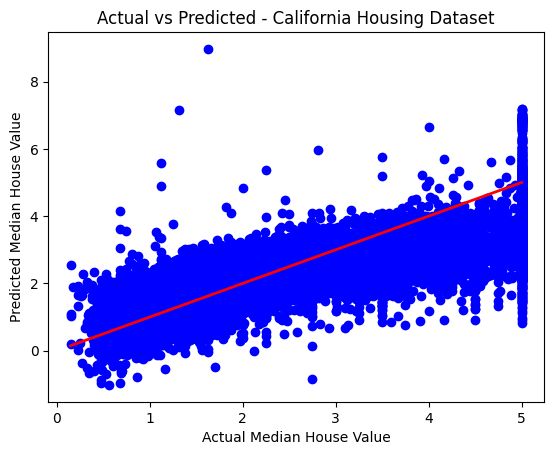

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

housing = fetch_california_housing()
X = housing.data
y = housing.target

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

n = len(y)#no of samples
k = X.shape[1]#no of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)#for maintaining the productiveness of r2 when new features are added

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

new_data = X[0].reshape(1, -1)#first sample
new_prediction = model.predict(new_data)
print(f"Prediction for new sample: {new_prediction[0]:.2f}")

print("\nActual vs Predicted Values:")
for i in range(10):
    print(f"Actual: {y[i]:.2f} \t Predicted: {y_pred[i]:.2f}")

plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted - California Housing Dataset")
plt.show()

Polynomial Regression (degree 2):
MAE: 0.6282915588701904
MSE: 0.7032732680932143
RMSE: 0.838613896911573
R² Score: 0.46331772769346236


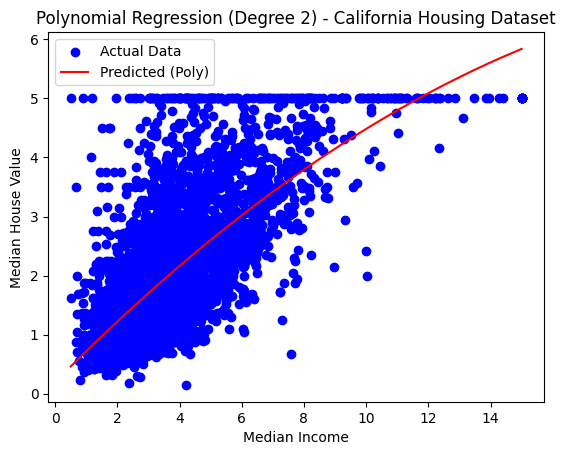


Actual vs Predicted Values (sample):
    Actual  Predicted
0  0.47700   1.064941
1  0.45800   1.480917
2  5.00001   1.927254
3  2.18600   2.913176
4  2.78000   2.039389
5  1.58700   2.479713
6  1.98200   2.638701
7  1.57500   2.023805
8  3.40000   2.518258
9  4.46600   3.835020


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

housing = fetch_california_housing()
X = housing.data[:, housing.feature_names.index('MedInc')].reshape(-1, 1) # Using Median Income feature
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial transformation->degree 2
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression (degree 2):")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# Visualization
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
# Sort the X_test values for a smooth curve plot
X_test_sorted = np.sort(X_test, axis=0)
y_pred_sorted = model.predict(poly_features.transform(X_test_sorted))
plt.plot(X_test_sorted, y_pred_sorted, color="red", label="Predicted (Poly)")

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Polynomial Regression (Degree 2) - California Housing Dataset")
plt.legend()
plt.show()

results = pd.DataFrame({
    "Actual": y_test.flatten(),
    "Predicted": y_pred.flatten()
})

print("\nActual vs Predicted Values (sample):")
print(results.head(10))

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)

data1 = pd.DataFrame({
    'Age': np.random.randint(18, 30, 50),
    'Height': np.random.randint(155, 186, 50),
    'Weight': np.random.randint(59, 100, 50),
    'TimeOnExercise': np.random.randint(10, 18, 50),
})

data1['WeightReduction'] = (#target column linearly depending on other cols
    0.2 * data1['Age']
    + 0.5 * data1['Height']
    + 1.0 * data1['Weight']
    + 2.5 * data1['TimeOnExercise']
    + np.random.normal(0, 10, 50)#random noise to make it realistic
)

X1 = data1[['Age', 'Height', 'Weight', 'TimeOnExercise']]
y1 = data1['WeightReduction']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

print("\nWeight Reduction Model")
print("MAE:", mean_absolute_error(y1_test, y1_pred))
print("MSE:", mean_squared_error(y1_test, y1_pred))
print("RMSE:", np.sqrt(mean_squared_error(y1_test, y1_pred)))
print("R²:", r2_score(y1_test, y1_pred))
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)
print(pd.DataFrame({'Actual': y1_test[:5], 'Predicted': y1_pred[:5]}))

data2 = pd.DataFrame({
    'Area': np.random.randint(900, 2100, 50),
    'Bedrooms': np.random.randint(1, 10, 50),
    'Bathrooms': np.random.randint(1, 5, 50),
    'Stories': np.random.randint(1, 5, 50),
})

data2['Price'] = (
    250 * data2['Area']
    + 60000 * data2['Bedrooms']
    + 70000 * data2['Bathrooms']
    + 20000 * data2['Stories']
    + np.random.normal(0, 20000, 50)
)

X2 = data2[['Area', 'Bedrooms', 'Bathrooms', 'Stories']]
y2 = data2['Price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

print("\nHouse Price Model")
print("MAE:", mean_absolute_error(y2_test, y2_pred))
print("MSE:", mean_squared_error(y2_test, y2_pred))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))
print("R²:", r2_score(y2_test, y2_pred))
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
print(pd.DataFrame({'Actual': y2_test[:5], 'Predicted': y2_pred[:5]}))


Weight Reduction Model
MAE: 8.571558148552986
MSE: 137.81872809719604
RMSE: 11.739622144566496
R²: 0.6252114581347672
Coefficients: [0.41047512 0.24819846 1.01067061 2.444675  ]
Intercept: 37.67445095934809
        Actual   Predicted
13  187.526458  195.069699
39  198.581191  203.376288
30  169.812409  194.190869
45  194.309708  192.626751
17  223.237405  207.191462

House Price Model
MAE: 21891.667373066128
MSE: 569087032.9768803
RMSE: 23855.54512009483
R²: 0.9892459523297288
Coefficients: [  252.0756105  59071.16196649 72018.59891089 18846.5379022 ]
Intercept: -1936.0192220467143
          Actual     Predicted
13  1.029722e+06  9.920926e+05
39  9.807128e+05  9.545755e+05
30  1.146199e+06  1.120403e+06
45  9.628995e+05  9.737026e+05
17  5.589446e+05  5.782288e+05


In [13]:
df1 = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv')

In [14]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Linear regression analysis on Titanic Dataset

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

X2 = df1.drop(columns="Survived").select_dtypes(include=['number'])
y2 = df1["Survived"]

X2 = X2.dropna()#dropping rows with NA
y2 = y2.loc[X2.index]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=0
)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

print("\nTitanic Dataset")
print("MAE:", mean_absolute_error(y2_test, y2_pred))
print("MSE:", mean_squared_error(y2_test, y2_pred))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, y2_pred)))
print("R²:", r2_score(y2_test, y2_pred))
print("Intercept:", model2.intercept_)
print(pd.DataFrame({'Actual': y2_test[:5].values, 'Predicted': y2_pred[:5]}))



Titanic Dataset
MAE: 0.39846981560135925
MSE: 0.20376727044677745
RMSE: 0.4514058821579283
R²: 0.1627429265420185
Intercept: 1.1119609190642537
   Actual  Predicted
0       0   0.232030
1       0   0.517770
2       1   1.088031
3       0   0.385867
4       1   0.726482


Logistic Regression on Titanic Dataset

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

url = "/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv"
data = pd.read_csv(url)
X = data.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X_train and X_test using the mean of the training data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LogisticRegression(max_iter=1000)#1000 to make sure safe convergence
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)#shows TP, TN, FP, FN:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

TN, FP, FN, TP = cm.ravel()
manual_accuracy = (TP + TN) / (TP + TN + FP + FN)
manual_precision = TP / (TP + FP) if (TP + FP) != 0 else 0
manual_recall = TP / (TP + FN) if (TP + FN) != 0 else 0
manual_f1 = 2 * manual_precision * manual_recall / (manual_precision + manual_recall) if (manual_precision + manual_recall) != 0 else 0

print("\nManual Calculation:")
print("Accuracy:", manual_accuracy)
print("Precision:", manual_precision)
print("Recall:", manual_recall)
print("F1 Score:", manual_f1)

Confusion Matrix:
 [[94 11]
 [37 37]]
Accuracy: 0.7318435754189944
Precision: 0.7708333333333334
Recall: 0.5
F1 Score: 0.6065573770491803

Manual Calculation:
Accuracy: 0.7318435754189944
Precision: 0.7708333333333334
Recall: 0.5
F1 Score: 0.6065573770491803
